In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("evaluation.csv")
df

,Unnamed: 0,player,mcts_simuls,mcts_rate,player_first,result_from_player,score_diff_from_player,moves
0,0,random,0,1.4,True,0,0,"[12, 13, 6, 0, 5, 11, 10, 9, 7, 4, 3, 15, 2, 1..."
1,1,random,0,1.4,False,-1,-1,"[4, 13, 1, 11, 6, 12, 15, 3, 8, 0, 14, 2, 9, 7..."
2,2,random,0,1.4,True,1,4,"[13, 5, 10, 12, 3, 11, 9, 14, 6, 0, 8, 1, 2, 1..."
3,3,random,0,1.4,False,1,3,"[15, 13, 14, 5, 3, 7, 1, 6, 8, 2, 4, 12, 11, 0..."
4,4,random,0,1.4,True,1,1,"[15, 1, 5, 10, 6, 2, 13, 9, 7, 14, 11, 12, 4, ..."
...,...,...,...,...,...,...,...,...
795,795,4x4-v2 (continue),250,1.4,False,-1,-2,"[9, 5, 10, 6, 8, 7, 4, 1, 11, 2, 0, 3, 13, 15,..."
796,796,4x4-v2 (continue),250,1.4,True,0,0,"[5, 9, 6, 4, 10, 14, 8, 2, 7, 13, 1, 15, 11, 0..."
797,797,4x4-v2 (continue),250,1.4,False,-1,-2,"[6, 5, 10, 9, 13, 1, 2, 8, 14, 7, 15, 3, 11, 4..."
798,798,4x4-v2 (continue),250,1.4,True,1,1,"[5, 10, 6, 3, 9, 13, 1, 12, 8, 7, 4, 14, 11, 1..."


(-1.0, 1.0)

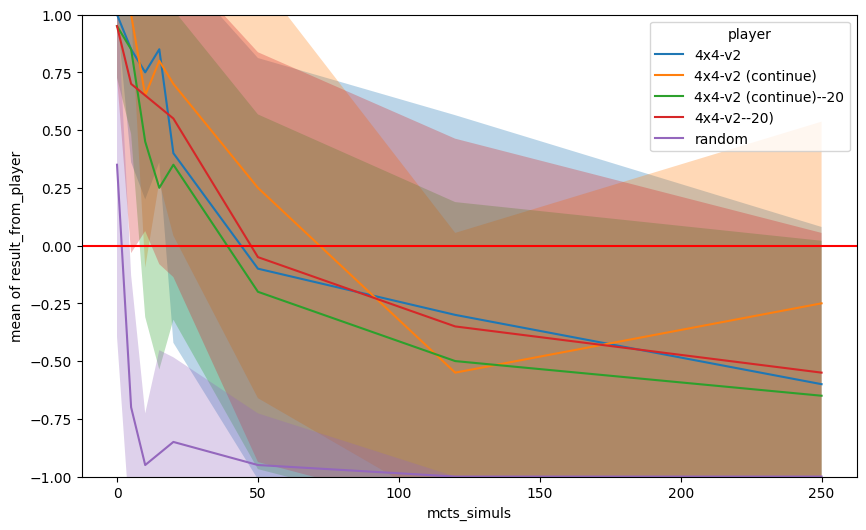

In [5]:
grouped = df.groupby(['player', 'mcts_simuls'])['result_from_player'].agg(['mean', 'std'])

pivoted = grouped.reset_index().pivot(index='mcts_simuls', columns='player', values='mean')
ax = pivoted.plot.line(figsize=(10, 6))

for player in pivoted.columns:
    y = pivoted[player]
    std = grouped.loc[player]["std"]
    ax.fill_between(x=y.index, y1=y-std, y2=y+std, alpha=0.3)

ax.set_xlabel('mcts_simuls')
ax.set_ylabel('mean of result_from_player')
plt.axhline(y=0, color='r', linestyle='-')
ax.set_ylim(-1, 1)

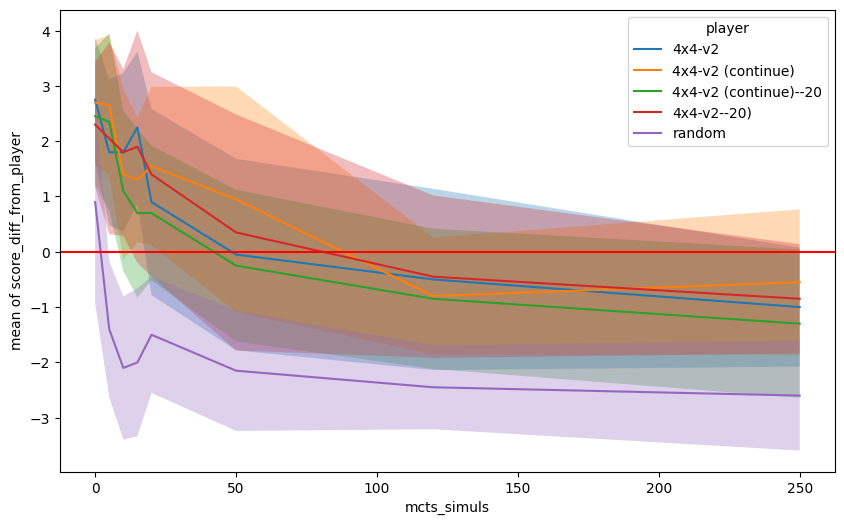

In [6]:
grouped = df.groupby(['player', 'mcts_simuls'])['score_diff_from_player'].agg(['mean', 'std'])

pivoted = grouped.reset_index().pivot(index='mcts_simuls', columns='player', values='mean')
ax = pivoted.plot.line(figsize=(10, 6))

for player in pivoted.columns:
    y = pivoted[player]
    std = grouped.loc[player]["std"]
    ax.fill_between(x=y.index, y1=y-std, y2=y+std, alpha=0.3)

ax.set_xlabel('mcts_simuls')
ax.set_ylabel('mean of score_diff_from_player')
plt.axhline(y=0, color='r', linestyle='-')
# ax.set_ylim(-1, 1)